# Black Friday Sale a exploratory analysis

The XYZ Company is an online retailer that sells a wide range of products. The company has observed that sales during Black Friday have been decreasing in recent years, and they would like to understand the reason and find ways to increase sales during this important shopping period. To investigate the problem, the company decides to collect information about customer purchases during Black Friday, including the user ID, product ID, gender, age, occupation, city category, years living in their current city, marital status, and product categories. The company hopes that this data will help them identify the main causes of the decline in sales during Black Friday and provide insights on how to increase sales in the future.

Possible causes for the decline in Black Friday sales could include:

-Competition from other retailers: The company may be facing increased competition from other retailers, both online and offline, who are also offering discounts and promotions during Black Friday. This could lead to customers choosing to shop elsewhere.

-Changes in consumer behavior: The way that consumers shop may have changed over time, with more people opting to shop online or during different times of the year. Understanding these changes in consumer behavior could help the company adapt its marketing and sales strategies.

-Decreased demand for the company's products: The demand for the company's products may have decreased for various reasons, such as a shift in consumer preferences or the introduction of new products in the market. Identifying the root cause of the decrease in demand could help the company take steps to address it.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('BlackFridaySales.csv')

In [3]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We have some missing data on product category but it wasn't filled on purpose.

# Here are some hypotheses we can develop based on the information provided in the dataframe description:

The purchase amount is influenced by the city category of the users and the gender of the user

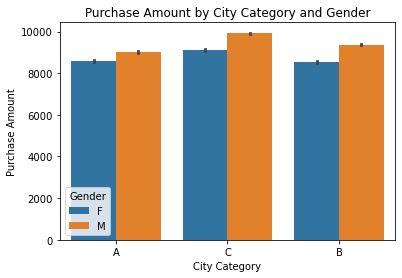

In [19]:
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=df)
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount by City Category and Gender')
plt.legend(title='Gender')
plt.show()

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

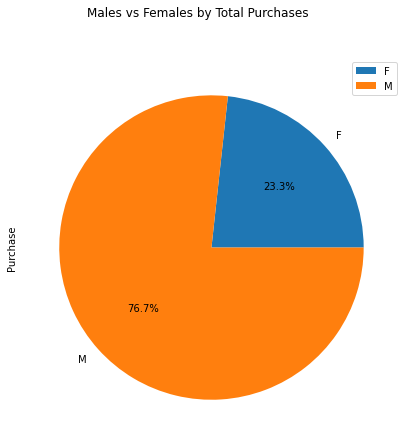

In [17]:
gender_pu=df[['Gender','Purchase']].groupby('Gender').sum()
gender_pu
gender_pu.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,7),title='Males vs Females by Total Purchases')

The Stay_In_Current_City_Years is a key variable to understand the purchase behavior

<AxesSubplot:title={'center':'Stay In Current City Years count'}, xlabel='Stay_In_Current_City_Years'>

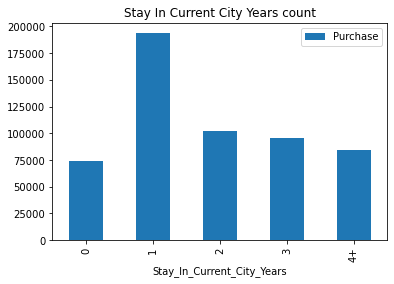

In [39]:
sc_count=df[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').count()
sc_count=sc_count.sort_values(by='Stay_In_Current_City_Years')
sc_count.plot(kind='bar',title='Stay In Current City Years count')


 The purchase amount (target variable) is influenced by the age, occupation and marital status of the users.

<AxesSubplot:title={'center':'Age count'}, xlabel='Age'>

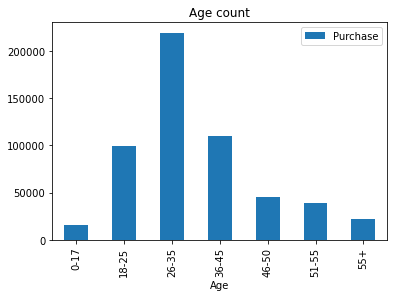

In [32]:
age_count=df[['Age','Purchase']].groupby('Age').count()
age_count=age_count.sort_values(by='Age')
age_count.plot(kind='bar',title='Age count')

<AxesSubplot:title={'center':'Marital Status count'}, xlabel='Marital_Status'>

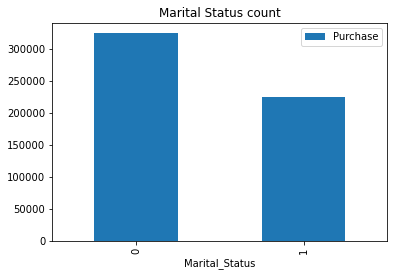

In [34]:
ms_count=df[['Marital_Status','Purchase']].groupby('Marital_Status').count()
ms_count=ms_count.sort_values(by='Marital_Status')
ms_count.plot(kind='bar',title='Marital Status count')

<AxesSubplot:title={'center':'Occupation count'}, xlabel='Occupation'>

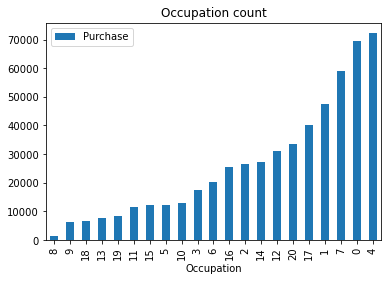

In [37]:
ocu_count=df[['Occupation','Purchase']].groupby('Occupation').count()
ocu_count=ocu_count.sort_values(by='Purchase',ascending=True)
ocu_count.plot(kind='bar',title='Occupation count')

# Insights and Proposed solution

After analyzing the data collected during the Black Friday sales, several insights have emerged regarding the factors that influence the purchase behavior of customers.

One of the most notable findings is that the male population is more involved in purchases, as well as customers who have been living in the city for only one year. This suggests that the company should focus more on the needs and preferences of male customers, as well as those who have recently moved to the city, in order to increase sales during the Black Friday period.

In addition, it was observed that customers between the ages of 26-35, who are single, and with occupation status 4,0,7 and 1, had a higher correlation with the purchase variable. This suggests that these customers are more likely to be the ones making the most purchases, and the company could focus on understanding the needs of this target group and tailor its marketing and sales strategies accordingly.

Based on these insights, the company could develop a targeted marketing strategy to attract male customers who have recently moved to the city, as well as those between the ages of 26-35, who are single, and with occupation status 4,0,7 and 1. The company could, for example, launch specific campaigns and promotions that would be relevant to these target groups, in order to increase their interest in buying during the Black Friday period.

Additionally, the company could analyze the products most commonly bought by the mentioned target groups, and potentially increase the stock of those products or give them more visibility on the website. Additionally, the company could also consider offering special discounts or promotions on those products to increase interest in these groups.

It's important to keep in mind that these suggestions are not definitive answers and should be validated with further testing and analysis. But with these insights, the company can now develop strategies that are more tailored to the audience, which can be more effective in increasing sales during Black Friday.